# Working with time series data with pandas 🐼

::::{grid}

:::{card}
:header: Context 🤔 
Today we are building up our arsenal of data structures with a really exciting one - the `pandas` `Dataframe`.  This is a data structure that models **tabular data**, or data with labelled rows and columns. Learning this data structure will allow us to start manipulating large datasets of that format, and do things that we couldn't otherwise do in a program like excel.
:::

:::{card}
:header: Outcomes 🎓 
Create pandas dataframes, locate values within a dataframe, and run functions on a dataframe. 

Use pandas to open some example airborne data from the SARP data folder.
:::

:::{card}
:header: Skills 🤓 
Creating filepaths and navigating the data directory.
::: 
::::

## From Lists to DataFrames - Labelled Data

Our first Python data structure was a List, which organized values in a certain order using an **index**. Indexing is common, but it requires the programmer to track the meaning of each item in the list in their head.

As an example, let's take a list which represents several days of forecast Air Quality Index (AQI) data for Hampton Roads, VA.

```{image} ./images/hampton_aqi.png
:alt: Github logo
:width: 400px
:align: center
```

In [11]:
hampton_aqi_list = [38, 38, 69, 60, 61, 48, 39]

hampton_aqi_list

[38, 38, 69, 60, 61, 48, 39]

If someone wanted to know "what is the AQI value for June 10th?" they would have to figure out that Jun 10th is the 6th value in the list. It therefore has index 5 and is accessed like:

In [13]:
hampton_aqi_list[5]

48

Pandas is also a library for keeping track of a list of values, but pandas data is **labelled**. This means that in addition to indexes values can be extracted using names. Here is an example of a pandas dataframe, the core pandas data structure, with the same data in it:

In [15]:
import pandas as pd

In [22]:
hampton_aqi_df = pd.DataFrame({'AQI': [38, 38, 69, 60, 61, 48, 39],}, 
                              index= ['2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', 
                                      '2023-06-09', '2023-06-10', '2023-06-11']
                             )
hampton_aqi_df

,AQI
2023-06-05,38
2023-06-06,38
2023-06-07,69
2023-06-08,60
2023-06-09,61
2023-06-10,48
2023-06-11,39


In [30]:
hampton_aqi_df.loc['2023-06-10']

AQI    48
Name: 2023-06-10, dtype: int64

## 🗃️ Libraries

Today we are going to dig into our first library in Python!  A **library** is a like an "extras" package for a programming language (think Settlers of Catan expansion pack).  It is a set of commands that doesn't automatically come activated when you use Python, but that you can still use if you just tell Python that you plan to do so.  You let python know you are going to use a library with an `import` statment.  After you do that the additional commands become availble.

In [1]:
# Attempting to use the `math` library before importing
math.factorial(3)

NameError: name 'math' is not defined

In [57]:
# Importing a Python library
import math

In [58]:
# Attempt #2 to use the `math` libray, after importing
math.factorial(3)

6

Once we have imported the library we can use the new commands that the library contains.  The `math` library was just an example and it isn't the focus of this lesson, but if you want you can see a list of `math` commands [here](https://docs.python.org/3/library/math.html).

````{seealso} Vocabulary

**Library:** additional coding objects (Ex. functions, data structures) that you can add to your code by importing them

````

:::{admonition} 🌀 More Info: Standard vs. Non-standard Libraries
:class: note, dropdown

One large chunk of libraries are together referred to as the **Python Standard Library**. These libraries are not a part of the "core" language (everything we can do without import statments) but have still been offically accepted into the Python distribution package and are maintained in the same way as the rest of the core language.  You can read more [here](https://docs.python.org/3/tutorial/stdlib.html).

There are also libraries which aren't a part of this designation, and are still widely used and developed, but they are simply not included when you hit the "Download Python" button.  Non-standard libraries are maintained by groups of developers outside of the Python Software Foundation and anyone can make one.  That includes you!

:::

## 🐼 Tabular Data and `pandas`

**Tabular data** is the type of data that you would see in an excel sheet.  Data is organized into rows (horizontal) and columns (vertical).  It is also common for tabular data to have an index which uniquely lables the rows.  A really common type of tabular data is a CSV file.

![L3_tabular_data.png](./images/tabular_data.png)
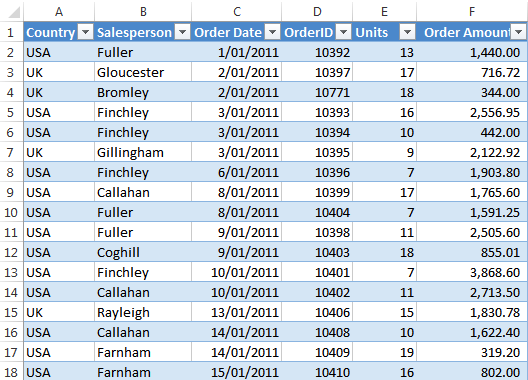

Where are the rows, columns, and indexes in this excel sheet?

## `pandas` library 🐼

`pandas` is a very common library that is used for working with tabular data.  It is cannonically imported like this:

In [4]:
# Import the libary.  You only have to do this once per file.
import pandas as pd

In [5]:
# This line shortens the output. It will be explained more later in the notebook.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)

## `pandas` Data structure: `pd.DataFrame`

A `pandas` **dataframe** is a data structure organized into rows and columns.  Other important parts of the anatomy of a data frame are the columns names and the index.

```{image} ./images/pandas_dataframe.png
:alt: pandas dataframe
:width: 600px
:align: center
```

_Image ammended from 
[pandas documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)._

Here's how we can make one from a little bit of scratch data.

In [6]:
# Step 1 - Define our fake data with a dictionary
forecast_dict = {
    'temperature': [25, 20, 27, 31], 
    'humidity': [60, 65, 62, 80],
    'wind_speed': [10, 9, 10, 6]
}
# Step 2 - use `pd.DataFrame()` to convert our dictionary into a dataframe
# Assign it to a variable called `forecast`
forecast = pd.DataFrame(forecast_dict, 
                        index  = ['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04'])

In [7]:
# View the dataframe
forecast

,temperature,humidity,wind_speed
2020-07-01,25,60,10
2020-07-02,20,65,9
2020-07-03,27,62,10
2020-07-04,31,80,6


Our first dataframe!  We can see that we have 3 columns, with column names `temperature`, `humidity`, and `wind_speed`.  We have 4 data entries, or 4 rows, labeled by our indexes, which in this case are just the numbers 0-3.

## Accessing values in `pd.DataFrame()`

Even though pandas dataframes are new data structures, some of the patterns for accessing data are very similar to what we saw in the list and dictionary data structures.  What's exciting is that the concept -- indexing -- is conceptually similar and so in response the syntax is also similar.

Two main ways you may want to access data in a dataframe might be:
1. look at all the data in a single column
2. look at all the data in a single row

### Accessing a column
The syntax for this is akin to looking up an item in a dictionary or a value in a list, we use square brackets `[]`:

In [8]:
forecast['humidity']

2020-07-01    60
2020-07-02    65
2020-07-03    62
2020-07-04    80
Name: humidity, dtype: int64

### Accessing a row by label

The syntax for looking at a particular row is `.loc[]`. It still has square brackets `[]`, as we are seeing over and over again in Python for accessing values, but the new syntax here is the `loc` piece.

In [13]:
forecast.loc['2020-07-02']

temperature    20
humidity       65
wind_speed      9
Name: 2020-07-02, dtype: int64

In [14]:
forecast.loc['2020-07-02':'2020-07-04']

,temperature,humidity,wind_speed
2020-07-02,20,65,9
2020-07-03,27,62,10
2020-07-04,31,80,6


### Accessing a row by index
When looking up data for a row we use the indexes, and the same `[]` syntax that we have seen in lists.  `pandas` uses the `[]` and `:` notation in the exact same way.  The only new addition is the `.iloc` syntax that goes before the square brackets `[]`.

In [10]:
# Display just the row of index 2
forecast.iloc[2]

temperature    27
humidity       62
wind_speed     10
Name: 2020-07-03, dtype: int64

In [11]:
# Display rows index 2-3
forecast.iloc[2:4]

,temperature,humidity,wind_speed
2020-07-03,27,62,10
2020-07-04,31,80,6


### Summary

`.loc[]` and `.iloc[]` may be initially confusing at that is okay. Understanding the difference involves understanding how an index and an index label are different: An index is always a number starting from 0 and sequentially increasing. The label can be any type of text (or number) that references a row. Index labels are often dates/times, which is why pandas is a common tool for timeseries data.

While I don't know of any formal or recognized shorthand for `loc` and `iloc`, I sometimes remember them by thinking that `loc` is for "location" and `iloc` is for "integer location". Calling `iloc` "integer location" isn't _strictly_ true 100% of the time, but it's still a helpful mental tool to help me remember which is which.

```{image} ./images/accessing_pandas_values.jpg
:alt: accessing values in pandas
:width: 800px
:align: center
```

_The checkins below use the `forecast` dataframe we have been working with._

In [15]:
forecast

,temperature,humidity,wind_speed
2020-07-01,25,60,10
2020-07-02,20,65,9
2020-07-03,27,62,10
2020-07-04,31,80,6


:::{admonition} Checkin
:class: tip

1. Write a line of code to get just the `wind_speed` column.
2. Write a new line of code to get just the row of index 3.
3. Write a line of code to get just the data from July 4th.

:::

:::{admonition} Checkin
:class: tip

What is the value of `forecast['humidity'].iloc[2]`?

a) the row: 27	62	10

b) the column: 60  65  62  80

c) the row: 20	65	9

d) 65

e) 62

[Poll link](https://PollEv.com/multiple_choice_polls/zKsN4K3CsQzZu1fLI0qQW/respond)

:::

### 🌟 A note about assigning dataframes to variables
It's easy to feel like when you do something to find one part of a dataframe (Ex. `forecast.iloc[2:4]` or `forecast['humidity']`) you have changed the dataframe.  This is not the case, however, and the original dataframe stays the same.

In [ ]:
# Looking up the 2nd and 3rd indices of the forecast dataframe
forecast.iloc[2:4]

In [ ]:
# `forecast` is still the same dataframe
forecast

This is nice for data exploration, when you don't want the values to change every time you look at them.  If you are trying to permanently change your data, you need to remember to update the dataframe by reassigning the variable.

In [ ]:
# Updating the forecast variable with just the two rows
forecast = forecast.iloc[2:4]

In [ ]:
# `forecast was updated`
forecast

## Using some real data

Part of accessing data is informing your code where it can find that data. In this lesson we are going to access data that is located in the efs shared folder of the SARP drive.

In [17]:
from pathlib import Path

In [18]:
DATADIR = Path('/efs/sarp/data/rawdata_readonly')

In [19]:
file = (
    DATADIR
    / 'flight-test-data'
    / 'discoveraq-mrg60-p3b_merge_20110701_R4.ict'
)

`pd.read_csv()` is one of the go-to data opening functions in pandas. The first argument is the filepath and in a very clean file that may be the only argument you give. Often, though, you have to give additional arguments to help pandas read your file. `skiprows` is a common one. It tells pandas to ignore that number of rows at the top of the file. Rows at the top often contain metadata information.

In [20]:
discover = pd.read_csv(file, skiprows=171)

In [21]:
discover.columns.values

array([' UTC', ' JDAY', ' INDEX', ' FLIGHT', ' LOCAL_SUN_TIME',
       ' LATITUDE', ' LONGITUDE', ' ALTP', ' PRESSURE', ' TEMPERATURE',
       ' THETA', ' O3COLUMN', ' SZA', ' WNS', ' WND', ' FMS_TAS',
       ' FMS_SAT', ' FMS_GRD_SPD', ' Heading', ' FMS_TRK', ' IRS_PITCH',
       ' IRS_ROLL', ' IRS_VERT_ACC', ' ADC_IAS', ' GPS_ALT',
       ' A_DewPoint', ' A_CabinPressure', ' A_SurfTemp', ' A_TotalTemp',
       ' A_JNO2_Nadir', ' A_JNO2_Zenith', ' A_RadarAlt',
       ' C_DiffPressure', ' C_PotTempDegK', ' C_MachNumber',
       ' C_CabAltitude', ' C_VaporPresWater', ' C_SatVaporPresWater',
       ' C_SatVaporPresIce', ' C_MixingRatio', ' C_RelHumidity',
       ' ProfileNumber', ' SiteSeqNumber', ' MissedApproachNumber',
       ' ProfileCenterBearing', ' H2O(DLH)', ' NO', ' NOy', ' NO2_NCAR',
       ' O3', ' Carbon_Monoxide_mixing_ratio', ' Methane_mixing_ratio',
       ' Carbon_dioxide_mixing_ratio', ' NO2_LIF', ' PNs_TD-LIF',
       ' ANs_TD-LIF', ' HNO3_TD-LIF', ' CH2O_DFGAS', ' Abs4

In [73]:
discover

,UTC,JDAY,INDEX,FLIGHT,LOCAL_SUN_TIME,LATITUDE,...,Sodium,Ammonium,Potassium,Magnesium,Calcium,Water-Soluble_Organic_Carbon_Mass
0,51930,182,10001,1,9.403683,37.989785,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
1,51990,182,10002,1,9.421592,37.988955,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
2,52050,182,10003,1,9.436436,37.949315,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
3,52110,182,10004,1,9.450309,37.923548,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
4,52170,182,10005,1,9.466201,37.962125,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,77310,182,10424,1,16.450163,38.157933,...,-999999,-999999,-999999.0,-999999.0,-999999.0,1.141667
424,77370,182,10425,1,16.468866,38.108382,...,-999999,-999999,-999999.0,-999999.0,-999999.0,1.145000
425,77430,182,10426,1,16.487703,38.061325,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000
426,77490,182,10427,1,16.505194,38.013657,...,-999999,-999999,-999999.0,-999999.0,-999999.0,-999999.000000


:::{attention} 
Practice Problem #2
:::

## Functions/methods for pandas dataframes

The dataframe represents the data but functions or methods allow us to manipulate that data. Let's look at a few examples using a single column of the `discover` dataframe, the relative humidity.

In [82]:
discover[' RHamb']

0      50.204500
1      54.015667
2      47.659000
3      47.801167
4      52.815000
         ...    
423    71.283167
424    65.042333
425    64.859500
426    67.741333
427    70.299500
Name:  RHamb, Length: 428, dtype: float64

Some aggregations:

In [80]:
discover[' RHamb'].mean()

36.807866043544394

In [79]:
discover[' RHamb'].std()

18.736073018487495

:::{admonition} Notice
:class: note
The syntax for methods on pandas dataframes is the same one that we saw for lists. It is `df.method()`, just like `list.method()`.
:::

We can use comparisons to check values

In [85]:
discover[' RHamb'] > 50

0       True
1       True
2      False
3      False
4       True
       ...  
423     True
424     True
425     True
426     True
427     True
Name:  RHamb, Length: 428, dtype: bool

Using a comparison together with a `.sum()` gives us the number of rows that meet the condition.

In [88]:
rd_over_50 = discover[' RHamb'] > 50
rd_over_50.sum()

108

Let's take a look at another column, CO.

In [70]:
discover[' Carbon_Monoxide_mixing_ratio']

0      144.336400
1      146.655167
2      143.108367
3      144.393611
4      143.252833
          ...    
423    143.836500
424    144.404167
425    143.722571
426    146.834500
427    152.337167
Name:  Carbon_Monoxide_mixing_ratio, Length: 428, dtype: float64

In [89]:
discover[' Carbon_Monoxide_mixing_ratio'].mean()

-11550.41168590564

A negative value? Why might that be? If we look back at the data we see that there are very large negative numbers (-999999) that likely represent nodata values.

One way to confirm this is the case would be to sort the rows. The method for this is `.sort_values()`. It's worth taking a moment to glance at [the documentation page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) for `.sort_values()`.

In [90]:
discover[' Carbon_Monoxide_mixing_ratio'].sort_values()

310   -999999.000000
187   -999999.000000
311   -999999.000000
188   -999999.000000
26    -999999.000000
           ...      
249       167.402368
267       169.639000
254       169.929500
387       170.772500
386       170.895000
Name:  Carbon_Monoxide_mixing_ratio, Length: 428, dtype: float64

In [91]:
discover[' Carbon_Monoxide_mixing_ratio'].sort_values(ascending=False)

386       170.895000
387       170.772500
254       169.929500
267       169.639000
249       167.402368
           ...      
26    -999999.000000
187   -999999.000000
188   -999999.000000
310   -999999.000000
311   -999999.000000
Name:  Carbon_Monoxide_mixing_ratio, Length: 428, dtype: float64

### A long chain of commands

With pandas you can string several commands together. This is a nice feature, but can make reading other people's code intimidating sometimes. If you see a long string step back and tackle reading it one method at a time.

In [99]:
(discover[' RHamb'] > 50).sort_values(ascending=False).drop(0).mean()

0.2505854800936768

:::{attention} 
Practice Problem #3
:::

## Closing Poll

[The closing poll link](https://PollEv.com/clickable_images/WHersUlQe5SsG68KOHyfL/respond) which is, as all the others are, anonymous.

:::{danger} Shutdown 
Please shut down your server! (File > Hub Control Panel) 
:::